# ライブラリ

In [81]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

# GPUの確認

In [82]:
device = (torch.device('cuda') if torch.cuda.is_available()
            else torch.device('cpu'))
device

device(type='cuda')

# CIFAR10のダウンロード

In [83]:
from torchvision import datasets, transforms
data_path = "./data"
cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


# CIFAR10の仕様確認

In [84]:
len(cifar10), len(cifar10_val)

(50000, 10000)

In [85]:
cifar10.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

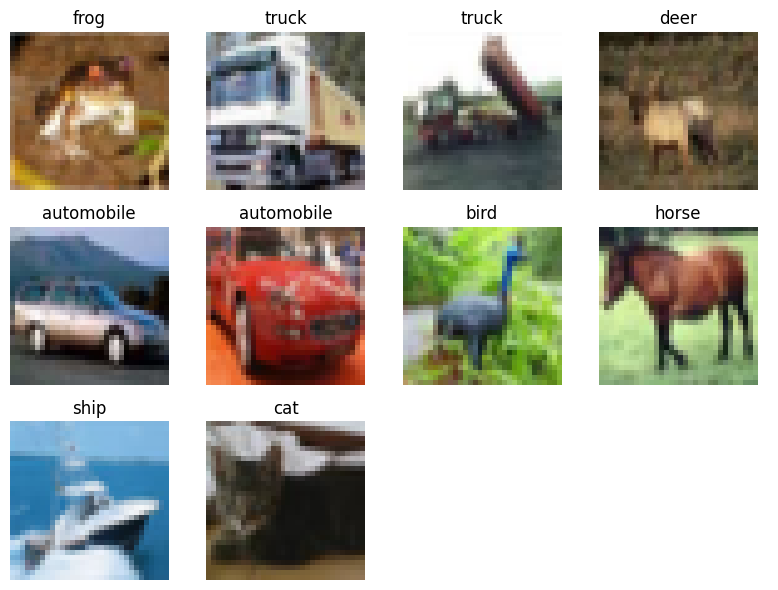

In [86]:
import math
num_images = 10
imgs, labels = [], []
for i in range(num_images):
    img, label = cifar10[i]
    imgs.append(img)
    labels.append(label)
cols = math.ceil(math.sqrt(num_images))
rows = math.ceil(num_images / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for i, (img, label) in enumerate(zip(imgs, labels)):
    axes[i].imshow(img.permute(1, 2, 0))
    axes[i].set_title(cifar10.classes[label])
    axes[i].axis('off')

for j in range(i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [87]:
cifar10[0][0].shape

torch.Size([3, 32, 32])

In [88]:
imgs = torch.stack([img for img, _ in cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [89]:
imgs.view(3, -1).mean(dim=1), imgs.view(3, -1).std(dim=1)

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

# 正規化

In [90]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False, 
                           transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                            ]))
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                                 transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                             ]))

# モデル

In [91]:
import torch
import torch.nn as nn

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )

model.to(device=device)

learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

# 学習

In [92]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

In [93]:
n_epochs = 100
losses = []

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device = device)
        labels = labels.to(device = device)
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    losses.append(float(loss))
    print(f"Epoch: {epoch}, Loss: {float(loss)}")


Epoch: 0, Loss: 1.8393231630325317
Epoch: 1, Loss: 1.377354621887207
Epoch: 2, Loss: 1.992598056793213
Epoch: 3, Loss: 1.2991199493408203
Epoch: 4, Loss: 1.6469547748565674
Epoch: 5, Loss: 1.1769356727600098
Epoch: 6, Loss: 1.235960602760315
Epoch: 7, Loss: 1.3309745788574219
Epoch: 8, Loss: 2.0593605041503906
Epoch: 9, Loss: 1.0380967855453491
Epoch: 10, Loss: 1.2320199012756348
Epoch: 11, Loss: 1.3290818929672241
Epoch: 12, Loss: 1.2253364324569702
Epoch: 13, Loss: 1.4846980571746826
Epoch: 14, Loss: 0.8920115828514099
Epoch: 15, Loss: 1.1684494018554688
Epoch: 16, Loss: 1.1214113235473633
Epoch: 17, Loss: 1.3533624410629272
Epoch: 18, Loss: 0.6674745678901672
Epoch: 19, Loss: 1.1560454368591309
Epoch: 20, Loss: 1.208069920539856
Epoch: 21, Loss: 1.132025957107544
Epoch: 22, Loss: 1.019705891609192
Epoch: 23, Loss: 0.9856096506118774
Epoch: 24, Loss: 0.9310532808303833
Epoch: 25, Loss: 1.080420732498169
Epoch: 26, Loss: 0.9732165336608887
Epoch: 27, Loss: 0.6964455842971802
Epoch: 28

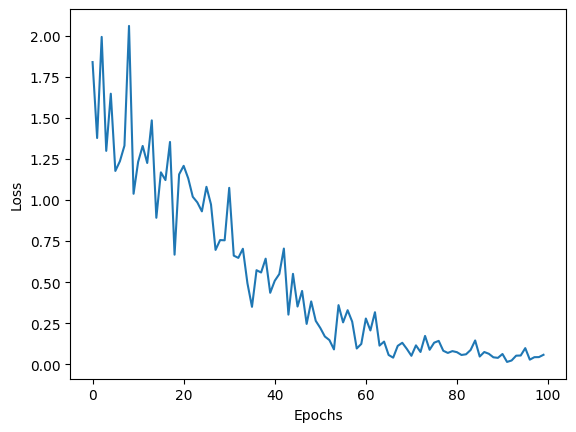

In [94]:
plt.plot(range(n_epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()